Data Description:
A sample survey data (Sample Survey.xlsx) is provided for analysis. Samples were collected
over a period of nine days where the respondents were asked questions related to elections.
Survey weights are in the “weight” column. The description for each column is provided in the
excel sheet under tab named “Description”. Applicants are requested to use python-pandas for
all data manipulations and matplotlib for any plotting related questions. Applicants are expected
to not use for-loops or any kind of iterations for solving the questions. Use in built pandas
functions only.
**All samples are synthetic and do not correspond to any actual survey conducted by Dhruv.
Questions:
1. Load the dataset into a pandas dataframe. Name the variable as “survey”.
2. How many samples were collected on each day?
3. What proportion of the total respondents were aged less than 45?
4. Create a new column in the dataframe “age_group”. This column should contain the age
group the respondent belongs to. The age groups are 18-25, 25-40, 40-55 and 55+. The
dataframe should look like this after the column creation:
|response_id |age |age_group |
| ----- | ----- | ----- |
|1 |26 |25-40 |
|2 |34 |25-40 |
|3 |25 |25-40 |
|4 |66 |55+ |
5. How many samples were collected for each age-group? Which age-group had the most
samples?
6. What proportion of the respondents had opted for the RJD party in both the Vote_Now
and the Past_Vote questions?
7. For each day of sample collection, determine the proportion of respondents who were
fully satisfied with the performance of the CM. So if there were a total of 1000 samples
on day 1 and 300 out of those said they were fully satisfied, then our answer for that day
would be 0.3.
8. In a similar fashion create a day-wise proportion of respondents that opted fully
dissatisfied with their MLA. Create a line plot of the result with date on x-axis and
proportions on the y-axis.
9. Create a pivot-table (or crosstab) with index as Past_Vote, Column as Vote_Now and
cell values as the count of samples.
10. Repeat the above question with the cell values as the sum of “weight”.
11. Create a dataframe by performing a group by over age_group and calculate the count of
total samples under each age_group.
12. Create a dataframe by performing a group by over age_group and finding the count of
total samples for each age_group that opted for the JD(U) party in Vote_Now.
13. Join/Merge the two dataframes from questions 12 and 11 with the common column as
age_group.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib

In [2]:
df = pd.read_excel("Sample Survey.xlsx", sheet_name=None)

In [3]:
df.keys()

dict_keys(['Description', 'Data'])

# 1. Load the dataset into a pandas dataframe. Name the variable as “survey”.

In [4]:
survey = df["Data"]
survey.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1.0,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26.0,Male,211.0,Gen,0.346969
1,2.0,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34.0,Male,189.0,BC,0.603419
2,3.0,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25.0,Male,191.0,Gen,0.673762
3,4.0,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36.0,Male,194.0,Gen,1.101298
4,5.0,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22.0,Male,176.0,BC,0.333505


In [5]:
description = df["Description"]
description.head()

,Column,Description
0,response_id,Unique id for each sample (respondent).
1,collection_date,Date on which the sample was collected.
2,urban_rural,Whether the respodent belongs to a rural or ur...
3,education,The education qualitfication of the repondent
4,income,Income of the respondent.


In [6]:
survey.shape

(6867, 14)

In [7]:
description.shape

(14, 2)

In [8]:
survey.isnull().sum()

response_id         0
collection_date     0
urban_rural         0
education           0
income              0
Vote_Now            0
Past_Vote           0
CM_satisfaction     0
MLA_satisfaction    0
age                 0
gender              0
assembly_no         0
category            0
weight              0
dtype: int64

# 2. How many samples were collected on each day?

In [9]:
survey["collection_date"].unique()

array(['2020-08-24T00:00:00.000000000', '2020-08-25T00:00:00.000000000',
       '2020-08-26T00:00:00.000000000', '2020-08-27T00:00:00.000000000',
       '2020-08-28T00:00:00.000000000', '2020-08-29T00:00:00.000000000',
       '2020-08-30T00:00:00.000000000', '2020-08-31T00:00:00.000000000',
       '2020-09-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [10]:
survey["collection_date"].value_counts()

2020-08-24    1479
2020-08-25     998
2020-08-28     761
2020-08-27     665
2020-08-29     620
2020-09-01     607
2020-08-26     598
2020-08-30     582
2020-08-31     557
Name: collection_date, dtype: int64

# 3. What proportion of the total respondents were aged less than 45?

In [11]:
survey["age"].dtype

dtype('O')

In [12]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [13]:
survey[~survey['age'].apply(is_float)].head(10)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
123,124.0,2020-08-24,Rural,Post - Graduation,"BPL/Below ₹ 5,000",JD(U),Others,Fully Satisfied,Somewhat Dissatisfied,24ko,Male,180.0,Gen,2.092567


In [14]:
survey['age'] = survey['age'].replace(['24ko'],24)

In [15]:
survey[~survey['age'].apply(is_float)].head(10)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight


In [16]:
survey["age"].dtype

dtype('float64')

In [17]:
survey[survey.age<45].shape

(6399, 14)

In [18]:
respondants_less_than_45 = survey[survey.age<45].shape[0] / survey.shape[0]
respondants_less_than_45

0.9318479685452162

# 4. Create a new column in the dataframe “age_group”. This column should contain the age group the respondent belongs to. The age groups are 18-25, 25-40, 40-55 and 55+. The dataframe should look like this after the column creation:
|response_id |age |age_group |
 | ----- | ----- | ----- |
 |1 |26 |25-40 |
 |2 |34 |25-40 |
 |3 |25 |25-40 |
 |4 |66 |55+ |

In [19]:
def age_group(x):
    if x>=18 and x<25:
        return "18-25"
    elif x>=25 and x<40:
        return "25-40"
    elif x>=40 and x<55:
        return "40-55"
    else:
        return "55+"

In [20]:
survey["age_group"] = survey["age"].apply(age_group)

In [21]:
survey.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
0,1.0,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26.0,Male,211.0,Gen,0.346969,25-40
1,2.0,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34.0,Male,189.0,BC,0.603419,25-40
2,3.0,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25.0,Male,191.0,Gen,0.673762,25-40
3,4.0,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36.0,Male,194.0,Gen,1.101298,25-40
4,5.0,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22.0,Male,176.0,BC,0.333505,18-25


In [22]:
survey[["response_id", "age", "age_group"]].head()

,response_id,age,age_group
0,1.0,26.0,25-40
1,2.0,34.0,25-40
2,3.0,25.0,25-40
3,4.0,36.0,25-40
4,5.0,22.0,18-25


# 5. How many samples were collected for each age-group? Which age-group had the most samples?

In [23]:
survey["age_group"].value_counts()

25-40    3844
18-25    2094
40-55     801
55+       128
Name: age_group, dtype: int64

The age group between 25-40 has the most samples of 3844

# 6. What proportion of the respondents had opted for the RJD party in both the Vote_Now and the Past_Vote questions?

In [24]:
survey[(survey.Vote_Now == 'RJD') & (survey.Past_Vote == 'RJD')].shape

(811, 15)

In [25]:
respondants_opted_RJD_both = survey[(survey.Vote_Now == 'RJD') & (survey.Past_Vote == 'RJD')].shape[0] / survey.shape[0]
respondants_opted_RJD_both

0.1181010630551915

# 7. For each day of sample collection, determine the proportion of respondents who were fully satisfied with the performance of the CM. So if there were a total of 1000 samples on day 1 and 300 out of those said they were fully satisfied, then our answer for that day would be 0.3.

In [26]:
survey["CM_satisfaction"].unique()

array(['Fully Dissatisfied', 'Somewhat Satisfied', 'Fully Satisfied',
       'Somewhat Dissatisfied', 'Can’t say'], dtype=object)

In [27]:
for key, subdf in survey.groupby('collection_date'):
    fully_satisfied_CM = subdf[subdf.CM_satisfaction == "Fully Satisfied"].shape[0]
    fully_satisfied_CM_portion = round((fully_satisfied_CM / subdf.shape[0]),4)
    print(f'On {key.date()} {subdf.shape[0]} voted in which {fully_satisfied_CM_portion} were fully satisfied')

On 2020-08-24 1479 voted in which 0.0987 were fully satisfied
On 2020-08-25 998 voted in which 0.0952 were fully satisfied
On 2020-08-26 598 voted in which 0.0987 were fully satisfied
On 2020-08-27 665 voted in which 0.0812 were fully satisfied
On 2020-08-28 761 voted in which 0.1209 were fully satisfied
On 2020-08-29 620 voted in which 0.1177 were fully satisfied
On 2020-08-30 582 voted in which 0.1117 were fully satisfied
On 2020-08-31 557 voted in which 0.1113 were fully satisfied
On 2020-09-01 607 voted in which 0.1236 were fully satisfied


# 8. In a similar fashion create a day-wise proportion of respondents that opted fully dissatisfied with their MLA. Create a line plot of the result with date on x-axis and proportions on the y-axis.

In [28]:
survey["MLA_satisfaction"].unique()

array(['Fully Dissatisfied', 'Somewhat Satisfied', 'Fully Satisfied',
       'Somewhat Dissatisfied', 'Can’t say'], dtype=object)

Text(0.5, 1.0, 'Line Plot')

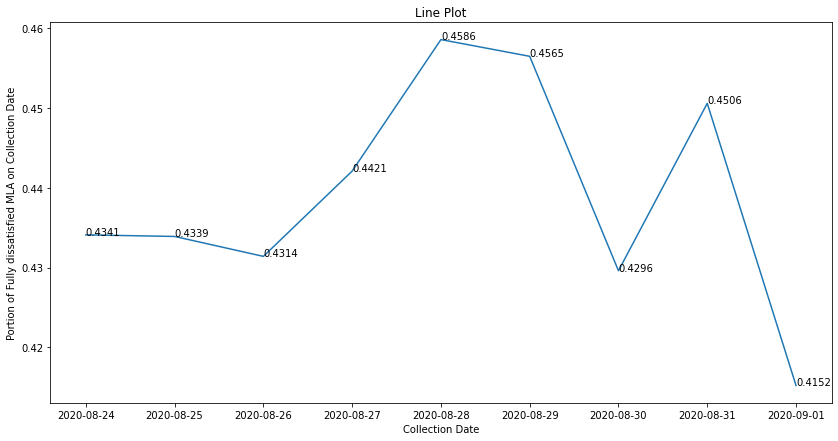

In [29]:
vote_date = []
fully_dissatisfied_MLA_portion_list = []

for key, subdf in survey.groupby('collection_date'):
    fully_dissatisfied_MLA = subdf[subdf.CM_satisfaction == "Fully Dissatisfied"].shape[0]
    fully_dissatisfied_MLA_portion = round((fully_dissatisfied_MLA / subdf.shape[0]),4)
    vote_date.append(key.date())
    fully_dissatisfied_MLA_portion_list.append(fully_dissatisfied_MLA_portion)

matplotlib.rcParams['figure.figsize'] = (14,7)
plt.plot(vote_date, fully_dissatisfied_MLA_portion_list)

for i,j in zip(vote_date, fully_dissatisfied_MLA_portion_list):
    plt.text(i, j, str(j))

plt.xlabel("Collection Date")
plt.ylabel("Portion of Fully dissatisfied MLA on Collection Date")
plt.title("Line Plot")

# 9. Create a pivot-table (or crosstab) with index as Past_Vote, Column as Vote_Now and cell values as the count of samples.

In [30]:
survey.pivot_table(index="Past_Vote", columns="Vote_Now",values="response_id", aggfunc="count").fillna(0)

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,7.0,1.0,1630.0,3.0,5.0,42.0,101.0,110.0,44.0,13.0,194.0,32.0,87.0,370.0,88.0,24.0,62.0,10.0
BSP,0.0,1.0,2.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Did not vote,8.0,5.0,231.0,2.0,1.0,22.0,41.0,69.0,10.0,16.0,83.0,11.0,51.0,195.0,20.0,3.0,31.0,5.0
HAM,2.0,0.0,25.0,0.0,1.0,0.0,3.0,2.0,2.0,0.0,4.0,0.0,0.0,6.0,4.0,0.0,1.0,0.0
INC,0.0,6.0,6.0,0.0,0.0,57.0,10.0,9.0,0.0,3.0,6.0,3.0,3.0,100.0,1.0,2.0,7.0,0.0
JAP(L),0.0,0.0,4.0,0.0,0.0,0.0,35.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0
JD(U),6.0,10.0,254.0,2.0,2.0,45.0,72.0,279.0,29.0,9.0,90.0,18.0,43.0,435.0,13.0,25.0,36.0,6.0
LJP,0.0,0.0,76.0,1.0,0.0,4.0,3.0,6.0,9.0,2.0,3.0,0.0,2.0,17.0,1.0,0.0,1.0,0.0
Left Front,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,18.0,1.0,1.0,0.0,4.0,0.0,1.0,0.0,1.0


# 10. Repeat the above question with the cell values as the sum of “weight”.

In [31]:
survey.pivot_table(index="Past_Vote", columns="Vote_Now", values="weight", aggfunc="sum").fillna(0)

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,4.807335,0.349996,1049.344112,0.452551,10.171283,50.055502,63.832368,68.029581,45.716215,7.537394,114.913686,8.790137,50.016163,250.948101,16.047570,18.715113,41.286954,18.691691
BSP,0.000000,1.654731,5.174487,32.010277,0.000000,2.298223,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Did not vote,8.865896,5.379527,114.203906,3.329611,2.497170,27.791290,26.359190,58.983458,11.801813,13.050113,44.725179,7.289933,25.319524,173.882525,4.349832,5.041587,22.015457,10.696552
HAM,0.312607,0.000000,25.348884,0.000000,1.648856,0.000000,0.712161,1.006719,2.496424,0.000000,0.928984,0.000000,0.000000,7.713008,1.903148,0.000000,0.039564,0.000000
INC,0.000000,11.105958,1.642875,0.000000,0.000000,161.742302,18.942597,11.077323,0.000000,6.268726,5.999014,1.552038,1.588527,195.020050,5.340403,1.140299,8.558475,0.000000
JAP(L),0.000000,0.000000,6.512846,0.000000,0.000000,0.000000,57.876224,0.000000,0.000000,0.000000,0.000000,3.195682,0.000000,2.164824,0.000000,0.000000,0.000000,0.000000
JD(U),12.457216,29.198610,156.243100,11.005903,2.639574,91.806261,106.217216,498.796862,33.148113,11.765603,61.109706,29.196072,45.175289,657.155514,4.015909,44.376194,58.137833,20.675288
LJP,0.000000,0.000000,85.010450,2.481377,0.000000,21.613385,7.375946,11.382812,26.868529,1.712452,0.813171,0.000000,1.927965,30.737989,0.478933,0.000000,1.709409,0.000000
Left Front,0.000000,2.298223,0.209586,0.000000,0.000000,2.291368,0.000000,0.000000,0.000000,44.280864,0.201455,8.309203,0.000000,6.740281,0.000000,0.877960,0.000000,3.020887


# 11. Create a dataframe by performing a group by over age_group and calculate the count of total samples under each age_group.

In [32]:
tuples_list11 = []
for key,subdf in survey.groupby('age_group'):
    tuples_list11.append((key, subdf.shape[0]))
    
df11 = pd.DataFrame(tuples_list11, columns=["age_group", "count"])
df11

,age_group,count
0,18-25,2094
1,25-40,3844
2,40-55,801
3,55+,128


# 12. Create a dataframe by performing a group by over age_group and finding the count of total samples for each age_group that opted for the JD(U) party in Vote_Now.

In [33]:
survey["Vote_Now"].unique()

array(['BJP', 'RLSP', 'JAP(L)', 'RJD', 'JD(U)', 'Others', 'LJP',
       'Undecided', 'NOTA', 'Plurals', 'INC', 'RJJP', 'BSP', 'AAP',
       'Left Front', 'AIMIM', 'HAM', 'VIP'], dtype=object)

In [34]:
tuples_list12 = []
for key, subdf in survey.groupby('age_group'):
    tuples_list12.append((key, subdf[subdf.Vote_Now == 'JD(U)'].shape[0]))
    
df12 = pd.DataFrame(tuples_list12, columns=["age_group", "count_for_JD(U)"])
df12

,age_group,count_for_JD(U)
0,18-25,181
1,25-40,264
2,40-55,68
3,55+,13


# 13. Join/Merge the two dataframes from questions 12 and 11 with the common column as age_group.

In [35]:
df13 = pd.merge(df12, df11, on='age_group')
df13

,age_group,count_for_JD(U),count
0,18-25,181,2094
1,25-40,264,3844
2,40-55,68,801
3,55+,13,128
